In [1]:
import pandas
import numpy
import networkx
from matplotlib import pyplot as plt
import pickle

In [2]:
pickle_in = open("nets.p","rb")
nets = pickle.load(pickle_in)

In [3]:
##############  network connectivity indexes  ################# 

def alpha(net):
    e = net.number_of_edges()
    v = net.number_of_nodes()
    
    out = (2*(e-v+1))/((v-1)*(v-2))
    return out

def gamma(net):
    e = net.number_of_edges()
    v = net.number_of_nodes()
    
    out = (2*e)/(v*(v-1))
    return out

def beta(net):
    e = net.number_of_edges()
    v = net.number_of_nodes()
    
    out = e/v
    return out

YEARS = list(nets)[::-1]
objects = [str(i) for i in YEARS]

In [4]:
al = []
ga = []
be = []
for net in nets:
    g = nets[net]
    print(f"in year {net} we have ... alpha : {alpha(g)} and gamma : {gamma(g)} and beta : {beta(g)}")
    al.append(alpha(g))
    ga.append(gamma(g))
    be.append(beta(g))

in year 95 we have ... alpha : 0.06662770309760374 and gamma : 0.09774011299435029 and beta : 2.8833333333333333
in year 90 we have ... alpha : 0.0803633822501747 and gamma : 0.11380471380471381 and beta : 3.0727272727272728
in year 85 we have ... alpha : 0.05387205387205387 and gamma : 0.08766233766233766 and beta : 2.4107142857142856
in year 80 we have ... alpha : 0.053109713487071976 and gamma : 0.08754208754208755 and beta : 2.3636363636363638
in year 70 we have ... alpha : 0.18571428571428572 and gamma : 0.2597402597402597 and beta : 2.727272727272727
in year 65 we have ... alpha : 0.16666666666666666 and gamma : 0.2647058823529412 and beta : 2.1176470588235294
in year 60 we have ... alpha : 0.21818181818181817 and gamma : 0.3484848484848485 and beta : 1.9166666666666667
in year 55 we have ... alpha : 0.1038961038961039 and gamma : 0.18181818181818182 and beta : 2.0


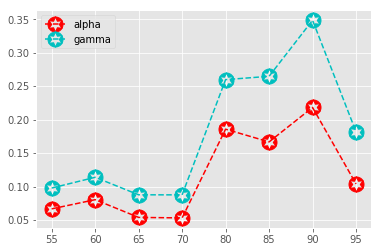

In [34]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np

plt.style.use("ggplot")
star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)

plt.plot(objects,al, '--r', marker=cut_star, markersize=15,label = "alpha")
plt.plot(objects,ga, '--c', marker=cut_star, markersize=15,label = "gamma")
plt.legend()
plt.savefig("alga.png")
plt.show()

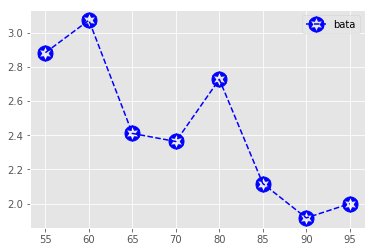

In [36]:
plt.close()
# plt.plot(objects,al, '--r', marker=cut_star, markersize=15,label = "alpha")
plt.plot(objects,be, '--b', marker=cut_star, markersize=15,label = "bata")
plt.legend()
plt.savefig("be.png")
plt.show()

In [4]:
def diameter(net):
    
    queue = list(networkx.algorithms.shortest_paths.generic.shortest_path_length(net))
    
    dij = []

    for q in queue:
        dij += list(q[1].values())

    return max(dij)
    

def centrality(net):
    queue = list(networkx.algorithms.shortest_paths.generic.shortest_path_length(net))
    
    dij = []

    for q in queue:
        dij.append(max(list(q[1].values())))

    return min(dij)

In [111]:
dia = []
cen = []
for net in nets:
    g = nets[net]
    print(f"in year {net} we have ... Diameter : {diameter(g)} and centrality : {centrality(g)}")
    dia.append(diameter(g))
    cen.append(centrality(g))

in year 95 we have ... Diameter : 4 and centrality : 2
in year 90 we have ... Diameter : 3 and centrality : 2
in year 85 we have ... Diameter : 4 and centrality : 2
in year 80 we have ... Diameter : 3 and centrality : 2
in year 70 we have ... Diameter : 3 and centrality : 2
in year 65 we have ... Diameter : 3 and centrality : 2
in year 60 we have ... Diameter : 2 and centrality : 1
in year 55 we have ... Diameter : 2 and centrality : 1


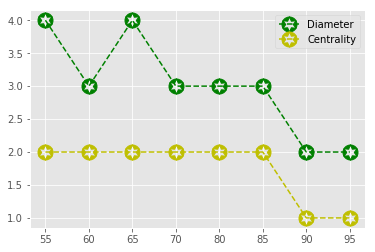

In [123]:
plt.style.use("ggplot")
star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)

plt.plot(objects,dia, '--g', marker=cut_star, markersize=15, label = "Diameter")
plt.plot(objects,cen, '--y', marker=cut_star, markersize=15, label = "Centrality")
plt.legend()
plt.savefig("diacen.png")
plt.show()

## let's make some Example

c:\users\esysss\appdata\local\programs\python\python37\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


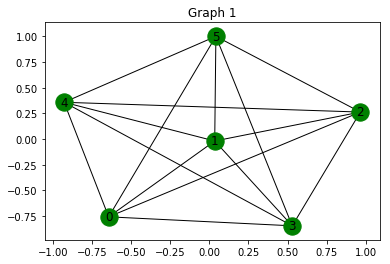

In [26]:
g1 = networkx.complete_graph(6)
networkx.draw_networkx(g1,node_color = "g")
plt.title("Graph 1")
plt.savefig("g1.png")
plt.show()

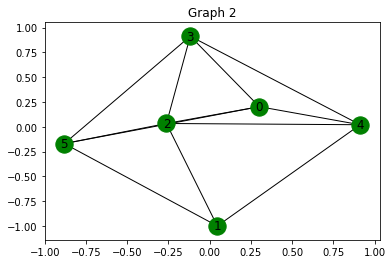

In [27]:
g2 = networkx.gnp_random_graph(6,.8)
networkx.draw_networkx(g2,node_color = "g")
plt.title("Graph 2")
plt.savefig("g2.png")
plt.show()

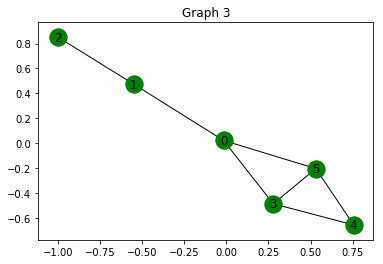

In [42]:
g3 = networkx.gnp_random_graph(6,.5)
networkx.draw_networkx(g3,node_color = "g")
plt.title("Graph 3")
plt.savefig("g3.png")
plt.show()

In [45]:
# save these three Graphs:
graphs = [g1,g2,g3]
pickle_out = open("graphs.p","wb")
pickle.dump(graphs, pickle_out)
pickle_out.close()

In [46]:
for net in graphs:
    g = net
    print(f"in year {net} we have ... alpha : {alpha(g)} and gamma : {gamma(g)} and beta : {beta(g)}")

in year  we have ... alpha : 1.0 and gamma : 1.0 and beta : 2.5
in year  we have ... alpha : 0.7 and gamma : 0.8 and beta : 2.0
in year  we have ... alpha : 0.2 and gamma : 0.4666666666666667 and beta : 1.1666666666666667


In [47]:
for net in graphs:
    g = net
    print(f"in year {net} we have ... Diameter : {diameter(g)} and centrality : {centrality(g)}")

in year  we have ... Diameter : 1 and centrality : 1
in year  we have ... Diameter : 2 and centrality : 1
in year  we have ... Diameter : 4 and centrality : 2
